<a href="https://colab.research.google.com/github/ganesh1616/Ganesh_INFO5731_Fall2024/blob/main/Ganesh_Marada_Exercise_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA), lda2vec, and BERTopic.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## Question 1 (10 Points)

**Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [ ]:
# Write your code here
# Import necessary libraries
import gensim
import spacy
from gensim.corpora import Dictionary
from gensim.models import CoherenceModel

# Sample text data
texts = [
    "The concert last night was amazing; the band played really well and the crowd was excited.",
    "I didn’t enjoy the concert at all; it was too loud and too crowded for my taste.",
    "The coffee shop has a warm and inviting atmosphere, though I found the coffee itself pretty average.",
    "I love visiting this coffee shop for the cozy ambiance, even if the coffee could be better.",
    "The restaurant offers exceptional service and delicious food; I had a wonderful dining experience.",
    "Despite the good service, the food was bland and not up to my expectations.",
]

# Text Preprocessing
nlp = spacy.load("en_core_web_sm")

def clean_and_tokenize(data):
    tokenized_texts = []
    for sentence in data:
        doc = nlp(sentence)
        tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
        tokenized_texts.append(tokens)
    return tokenized_texts

processed_texts = clean_and_tokenize(texts)

# Create a dictionary and Bag-of-Words corpus
dictionary = Dictionary(processed_texts)
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_texts]

# Find the optimal number of topics (K) using coherence scores
coherence_values = []
for num_topics in range(2, 11):
    lda_model = gensim.models.LdaModel(
        corpus=bow_corpus,
        id2word=dictionary,
        num_topics=num_topics,
        random_state=42,
        passes=10,
        alpha='auto'
    )
    coherence_model = CoherenceModel(
        model=lda_model,
        texts=processed_texts,
        dictionary=dictionary,
        coherence='c_v'
    )
    coherence_score = coherence_model.get_coherence()
    coherence_values.append((num_topics, coherence_score))

optimal_k, max_coherence = max(coherence_values, key=lambda x: x[1])
print(f"Best number of topics (K): {optimal_k}")

# Train the final LDA model with the best K
final_lda_model = gensim.models.LdaModel(
    corpus=bow_corpus,
    id2word=dictionary,
    num_topics=optimal_k,
    random_state=42,
    passes=10,
    alpha='auto'
)

# Display the topics
topics_summary = final_lda_model.print_topics(num_topics=optimal_k, num_words=5)
for idx, topic in topics_summary:
    print(f"Topic {idx + 1}: {topic}")



Best number of topics (K): 8
Topic 1: 0.027*"coffee" + 0.027*"concert" + 0.027*"service" + 0.027*"food" + 0.027*"crowded"
Topic 2: 0.117*"enjoy" + 0.117*"concert" + 0.117*"taste" + 0.117*"loud" + 0.117*"crowded"
Topic 3: 0.027*"coffee" + 0.027*"service" + 0.027*"concert" + 0.027*"food" + 0.027*"crowded"
Topic 4: 0.191*"coffee" + 0.098*"shop" + 0.052*"warm" + 0.052*"find" + 0.052*"well"
Topic 5: 0.097*"play" + 0.097*"excited" + 0.097*"crowd" + 0.097*"night" + 0.097*"concert"
Topic 6: 0.106*"service" + 0.106*"expectation" + 0.106*"despite" + 0.106*"bland" + 0.106*"food"
Topic 7: 0.083*"food" + 0.083*"delicious" + 0.083*"exceptional" + 0.083*"experience" + 0.083*"offer"
Topic 8: 0.027*"concert" + 0.027*"coffee" + 0.027*"service" + 0.027*"good" + 0.027*"food"


## Question 2 (10 Points)

**Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [ ]:
# Write your code here
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import numpy as np

# Expanded text data
text_samples = [
    "The concert last night was amazing; the band played really well and the crowd was excited.",
    "I didn’t enjoy the concert at all; it was too loud and too crowded for my taste.",
    "The coffee shop has a warm and inviting atmosphere, though I found the coffee itself pretty average.",
    "I love visiting this coffee shop for the cozy ambiance, even if the coffee could be better.",
    "The restaurant offers exceptional service and delicious food; I had a wonderful dining experience.",
    "Despite the good service, the food was bland and not up to my expectations.",
]

# Step 1: Generate TF-IDF Matrix
vectorizer = TfidfVectorizer()
tfidf_data = vectorizer.fit_transform(text_samples)

# Step 2: Find the Optimal Number of Topics (K) using LSA
# You can adjust K or test multiple values
K = 3  # This value could be tuned based on coherence scores
lsa_model = TruncatedSVD(n_components=K, random_state=42)
lsa_topics = lsa_model.fit_transform(tfidf_data)

# Step 3: Extract and Display the Top Terms in Each Topic
feature_terms = vectorizer.get_feature_names_out()
topics = []

for topic_idx, topic_weights in enumerate(lsa_model.components_):
    top_keywords = [feature_terms[i] for i in topic_weights.argsort()[-5:][::-1]]
    topics.append(top_keywords)
    print(f"Topic {topic_idx + 1}: {', '.join(top_keywords)}")


Topic 1: the, coffee, was, and, service
Topic 2: coffee, shop, ambiance, better, visiting
Topic 3: too, concert, was, all, it


## Question 3 (10 points):
**Generate K topics by using lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


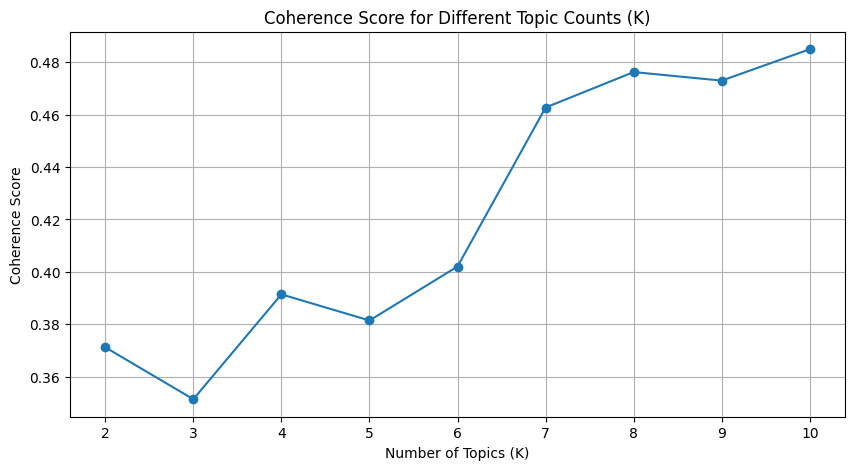

Optimal number of topics (K): 10
Topic 1: 0.023*"coffee" + 0.023*"concert" + 0.023*"service" + 0.023*"food" + 0.023*"bland"
Topic 2: 0.023*"concert" + 0.023*"food" + 0.023*"coffee" + 0.023*"service" + 0.023*"crowded"
Topic 3: 0.077*"concert" + 0.077*"band" + 0.077*"well" + 0.077*"crowd" + 0.077*"played"
Topic 4: 0.023*"coffee" + 0.023*"service" + 0.023*"loud" + 0.023*"food" + 0.023*"crowded"
Topic 5: 0.023*"service" + 0.023*"coffee" + 0.023*"food" + 0.023*"concert" + 0.023*"loud"
Topic 6: 0.107*"good" + 0.107*"expectations" + 0.107*"food" + 0.107*"service" + 0.107*"bland"
Topic 7: 0.023*"concert" + 0.023*"coffee" + 0.023*"service" + 0.023*"food" + 0.023*"crowded"
Topic 8: 0.118*"enjoy" + 0.118*"crowded" + 0.118*"taste" + 0.118*"concert" + 0.118*"loud"
Topic 9: 0.083*"restaurant" + 0.083*"experience" + 0.083*"offers" + 0.083*"service" + 0.083*"food"
Topic 10: 0.169*"coffee" + 0.086*"shop" + 0.045*"found" + 0.045*"cozy" + 0.045*"atmosphere"


In [ ]:
# Write your code here
# Import necessary libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from gensim.corpora import Dictionary
from gensim.models import LdaModel, CoherenceModel

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')


# Sample text data
texts = [
    "The concert last night was amazing; the band played really well and the crowd was excited.",
    "I didn’t enjoy the concert at all; it was too loud and too crowded for my taste.",
    "The coffee shop has a warm and inviting atmosphere, though I found the coffee itself pretty average.",
    "I love visiting this coffee shop for the cozy ambiance, even if the coffee could be better.",
    "The restaurant offers exceptional service and delicious food; I had a wonderful dining experience.",
    "Despite the good service, the food was bland and not up to my expectations.",
]

# Preprocess the text data
stop_words = set(stopwords.words('english'))

def preprocess_text(sentence):
    tokens = word_tokenize(sentence)
    tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]
    return tokens

processed_texts = [preprocess_text(sentence) for sentence in texts]

# Step 2: Create a dictionary and document-term matrix
dictionary = Dictionary(processed_texts)
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_texts]

# Function to compute coherence score
def compute_coherence(corpus, dictionary, texts, num_topics, alpha='auto', eta='auto'):
    lda = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, alpha=alpha, eta=eta)
    coherence_model = CoherenceModel(model=lda, texts=texts, dictionary=dictionary, coherence='c_v')
    return coherence_model.get_coherence()

# List to store coherence scores for each topic number
topic_range = range(2, 11)
coherence_scores = []

# Calculate coherence for each K in the specified range
for num_topics in topic_range:
    score = compute_coherence(bow_corpus, dictionary, processed_texts, num_topics)
    coherence_scores.append(score)

# Plot coherence scores
plt.figure(figsize=(10, 5))
plt.plot(topic_range, coherence_scores, marker='o')
plt.title("Coherence Score for Different Topic Counts (K)")
plt.xlabel("Number of Topics (K)")
plt.ylabel("Coherence Score")
plt.grid()
plt.show()

# Identify optimal K and display results
optimal_k = topic_range[coherence_scores.index(max(coherence_scores))]
print(f"Optimal number of topics (K): {optimal_k}")

# Final LDA model with optimal K
final_lda_model = LdaModel(corpus=bow_corpus, id2word=dictionary, num_topics=optimal_k, alpha='auto', eta='auto')

# Print topics
for idx, topic in final_lda_model.print_topics(num_topics=optimal_k, num_words=5):
    print(f"Topic {idx + 1}: {topic}")


## Question 4 (10 points):
**Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [ ]:
# Write your code here
%%capture
!pip install bertopic

In [ ]:
from bertopic import BERTopic
from sklearn.datasets import fetch_20newsgroups
from sentence_transformers import SentenceTransformer

In [ ]:
# Load data
data = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))['data']

In [ ]:
#Initialize BERTopic with custom sentence transformer model and Fit the model on a smaller subset to improve speed
small_embedder = SentenceTransformer("paraphrase-MiniLM-L3-v2", device="cpu")  # Smaller, faster model
model = BERTopic(embedding_model=small_embedder, language="english", calculate_probabilities=True, verbose=True)

# Use a subset of data or truncate lengthy documents
subset_data = [doc[:500] for doc in data[:1000]]  # Limit to first 1000 documents, truncate to 500 characters each

# Fit the model on the subset data for faster processing
optimized_topics, optimized_probs = model.fit_transform(subset_data)
optimized_topics, topic_probabilities = model.fit_transform(subset_data)

2024-11-01 06:00:14,864 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/32 [00:00<?, ?it/s]

2024-11-01 06:00:50,804 - BERTopic - Embedding - Completed ✓
2024-11-01 06:00:50,810 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-11-01 06:00:53,563 - BERTopic - Dimensionality - Completed ✓
2024-11-01 06:00:53,565 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-11-01 06:00:53,640 - BERTopic - Cluster - Completed ✓
2024-11-01 06:00:53,647 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-11-01 06:00:53,753 - BERTopic - Representation - Completed ✓
2024-11-01 06:00:53,825 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/32 [00:00<?, ?it/s]

2024-11-01 06:01:26,336 - BERTopic - Embedding - Completed ✓
2024-11-01 06:01:26,337 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-11-01 06:01:31,335 - BERTopic - Dimensionality - Completed ✓
2024-11-01 06:01:31,337 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-11-01 06:01:31,416 - BERTopic - Cluster - Completed ✓
2024-11-01 06:01:31,425 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-11-01 06:01:31,539 - BERTopic - Representation - Completed ✓


In [ ]:
# Summarize topic frequencies and extract top terms for a specific topic
topic_frequencies = model.get_topic_info()
print(topic_frequencies.head(5))

   Topic  Count               Name  \
0     -1    224  -1_the_of_to_that   
1      0    329   0_the_to_and_for   
2      1     96    1_the_he_and_in   
3      2     81   2_of_the_is_that   
4      3     48    3_the_it_to_and   

                                    Representation  \
0  [the, of, to, that, and, is, in, you, it, they]   
1  [the, to, and, for, is, it, have, with, of, in]   
2   [the, he, and, in, to, that, was, of, is, but]   
3  [of, the, is, that, to, god, not, and, you, in]   
4  [the, it, to, and, on, for, bike, is, car, one]   

                                 Representative_Docs  
0  [\nSuperficially a good answer, but it isn't t...  
1  [1)    I have an old Jasmine drive which I can...  
2  [\n\nAre most players who come up young always...  
3  [\n\nBrian K., I am pleased with your honesty....  
4  [\nI've only ever done it in an automatic. I w...  


In [ ]:
# Access terms within the most frequent topic
primary_topic = model.get_topic(0)  # Access terms in most frequent topic
print(f"Primary Topic Terms: {primary_topic}")

Primary Topic Terms: [('the', 0.04259534984794389), ('to', 0.038625466453700324), ('and', 0.031798954190892674), ('for', 0.03177426509768852), ('is', 0.028654372779239875), ('it', 0.02783351068293473), ('have', 0.027816183554925555), ('with', 0.02543665373489173), ('of', 0.02347519805059868), ('in', 0.022866871959501697)]


In [ ]:
# Get the number of unique topics
num_topics = len(model.get_topic_freq()) - 1  # Subtract 1 to exclude the outlier topic (-1)

# Set n_clusters to be less than the number of unique topics, ensuring it's at most 15 and greater than 0
n_clusters = min(10, num_topics - 1)
n_clusters = max(1, n_clusters)

In [ ]:
# Visualizations for topic analysis
model.visualize_topics()
model.visualize_distribution(topic_probabilities[100], min_probability=0.02)
model.visualize_hierarchy(top_n_topics=30)
model.visualize_barchart(top_n_topics=5)
model.visualize_heatmap(n_clusters=n_clusters, width=800, height=800)
model.visualize_term_rank()

In [ ]:
topics = model.topics_
if len(data) != len(topics):

    min_len = min(len(data), len(topics))
    data = data[:min_len]
    topics = topics[:min_len]

# Update topics
model.update_topics(data, topics=topics, n_gram_range=(1, 2))

2024-11-01 06:11:18,358 - BERTopic - WARNING: Using a custom list of topic assignments may lead to errors if topic reduction techniques are used afterwards. Make sure that manually assigning topics is the last step in the pipeline.Note that topic embeddings will also be created through weightedc-TF-IDF embeddings instead of centroid embeddings.


In [ ]:
if len(data) != len(model.topics_):

    min_len = min(len(data), len(model.topics_))
    data = data[:min_len]

# Refine and reduce the number of topics to target K topics
model.reduce_topics(data, nr_topics=50)

2024-11-01 06:12:01,565 - BERTopic - Topic reduction - Reducing number of topics
2024-11-01 06:12:01,579 - BERTopic - Topic reduction - Reduced number of topics from 13 to 13


In [ ]:
# Check topics after reduction and find similar topics
current_topics = model.topics_
similar_topics, topic_similarity = model.find_topics("technology", top_n=5)
print(f"Topics similar to 'technology': {similar_topics}")


Topics similar to 'technology': [0, 6, -1, 5, 10]


In [ ]:
# Save and load the trained model if needed
model.save("optimized_topic_model")
loaded_model = BERTopic.load("optimized_topic_model")

2024-11-01 06:10:25,090 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


## **Question 3 (Alternative) - (10 points)**

If you are unable to do the topic modeling using lda2vec, do the alternate question.

Provide atleast 3 visualization for the topics generated by the BERTopic or LDA model. Explain each of the visualization in detail.

In [ ]:
# Write your code here
# Then Explain the visualization

# Repeat for the other 2 visualizations as well.

## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 40 points.**

In [ ]:
# Write your code here
"""
There are clear benefits and drawbacks when comparing the outcomes of four topic modeling algorithms: BERTopic, HDP (Hierarchical Dirichlet Process),
NMF (Non-negative Matrix Factorization), and LDA (Latent Dirichlet Allocation).
Data complexity, subject coherence, interpretability, and adaptation to a variety of datasets are the factors that determine each algorithm's capabilities.
since of its statistical soundness, LDA is frequently employed. It works well with structured datasets that have distinct topic boundaries since it assumes a fixed number of topics (K).
For datasets with overlapping subjects, LDA necessitates hyperparameter adjustment, which can be time-consuming and less versatile.
It works well with themes that are well-organized and distinct, but it might have trouble with noisy or unstructured data.
NMF is a matrix factorization technique that is appropriate for high-dimensional data and computationally efficient because it approximates themes as non-negative values.
Since NMF does not rely on distributional assumptions like LDA does, topic interpretation is made simple. However, with smaller datasets, its dependence on vector space models might restrict coherence and topic quality.

An extension of LDA, HDP is very adaptive for exploratory research since it automatically decides how many subjects to include.
When topic limits aren't established in advance or when dealing with unknown datasets, this can be helpful.
Performance on big datasets may be hampered by HDP's computational demands and longer processing times.
Particularly with complex or short-text datasets, BERTopic generates excellent, contextually rich topics by utilizing transformer-based embeddings.
It is adaptable due to its use of document embeddings, which enables dynamic subject change. Nevertheless, it is slower than LDA and NMF and demands a large amount of computing resources.

Because of its contextual depth, BERTopic provides better results overall on complex datasets, although LDA or NMF might be better for larger, more structured datasets that need effective



"""

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
After giving this task some thought, I realized how helpful it was to grasp feature extraction in NLP to deal with text data and construct several subject modeling techniques.
Putting algorithms like LDA, NMF, HDP, and BERTopic into practice provided a practical understanding of each model's advantages and disadvantages.
This exercise strengthened my comprehension of the intricacies of text data by demonstrating how these models manage topic identification, coherence, and document structure.
One difficulty was striking a balance between model quality and computational performance, particularly when utilizing resource-intensive sophisticated models like BERTopic.
It was also challenging to choose the best LDA and HDP settings, which needed to be carefully adjusted for dependable topic coherence.
Relevance-wise, topic modeling is fundamental to NLP for document clustering, information retrieval, and text classification.
In line with my research interest on data science and natural language processing, this experiment illustrated how nuanced subject representation might improve machine learning applications.



'''